In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [5]:
path = r'C:\Users\utilizador\Documents\a_hjoaquim\a_semestre2-5oano\PSn\pratica\guia-3\abalone.csv'
df = pd.read_csv(path)

In [6]:
df

,Sex,Length(mm),Diameter(mm),Height(mm),Whole weight (g),Shucked weight (g),Viscera weight (g),Shell weight (g),Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
### Main Goal: Predict the number of Rings based on the other fields.
### Age = Rings + 1.5
### "Rings" field will be our class, meaning, the thing we want to predict. 
### This is a continuous variable and a supervised learning problem.

In [7]:
### Number of examples by class
df['Rings'].value_counts().sort_index()

1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: Rings, dtype: int64

In [6]:
### We pretend to make every column numeric
### As we can see, the only one left is Sex
### Let's change it, assuming: M ==> 1 and F ==> 0

In [8]:
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'M' else 0)
df

,Sex,Length(mm),Diameter(mm),Height(mm),Whole weight (g),Shucked weight (g),Viscera weight (g),Shell weight (g),Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [9]:
### Let's merge classes 1,2,3,4 and 5
### And the same for 20 to 29
### This way we can make a more even distribution

In [11]:
df['Rings'] = df['Rings'].apply(lambda x: 5 if x <= 5 else x)
df['Rings'] = df['Rings'].apply(lambda x: 20 if x >= 20 else x)
df['Rings'].value_counts().sort_index()

5     189
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     62
Name: Rings, dtype: int64

In [12]:
### Let's devide our dataset in predictors and class
predictors = df.drop(['Rings'], axis=1)
ringsClass = df['Rings']

In [13]:
### Let's split between training-set and test-set
X_train,X_test,y_train,y_test = train_test_split(predictors,ringsClass,random_state=0)

In [14]:
### Now, let's make our Knn Classifier
knn = KNeighborsClassifier(n_neighbors=5) # KNN com K=5
knn.fit(X_train,y_train)                # train the classifier
knn.score(X_test,y_test)                # test the result

0.23732057416267943

In [15]:
### As we can see, we got a pretty low score, since we're trying to predict in between 16 classes.
### Let's do as the example's literature suggest and try the following distribution:
### Class 1: 1...8
### Class 2: 10...10
### Class 3: 11...29
df['Rings'] = df['Rings'].apply(lambda x: 1 if x <= 8 else x)
df['Rings'] = df['Rings'].apply(lambda x: 2 if x >= 9 and x <= 10 else x)
df['Rings'] = df['Rings'].apply(lambda x: 3 if x >= 11 else x)
df['Rings'].value_counts().sort_index()

1    1407
2    1323
3    1447
Name: Rings, dtype: int64

In [16]:
### Since we're not talking about 'Rings' anymore, let's change our Class name
df.rename(columns = {'Rings':'Class'}, inplace = True)
df

,Sex,Length(mm),Diameter(mm),Height(mm),Whole weight (g),Shucked weight (g),Viscera weight (g),Shell weight (g),Class
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,3
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,1
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,2
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,3
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,2


In [17]:
### Let's try our Knn classification again
predictors = df.drop(['Class'], axis=1)
Class = df['Class']
X_train,X_test,y_train,y_test = train_test_split(predictors,Class,random_state=0)

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.6267942583732058

In [63]:
### Let's indivually classify the first 5 examples in the test set
firstFiveRows = X_test.head(5)
predictionClasses = []
neigs = []
for ex in range(5):
    prediction = str(knn.predict([X_test.iloc[ex].tolist()])[0])
    actualClass = str(y_test.iloc[ex])
    neigs = knn.kneighbors(X_test.iloc[ex].values.reshape(1, -1), n_neighbors=5); neigsStr = str(neigs)
    #neigsClass = [y_test.iloc[neig] for neig in neigs[1]]; neigsClassStr = str(neigsClass)
    
    print("Predicted class: " + prediction)
    print("Actual class: " + actualClass)
    print("Nearest neighbours: " + neigsStr)
    print("###########################################")
    #print("Nearest neighbour's class: " + neigsClassStr)
    
# TO-DO:
# We should look into the near neighbour's class,
# to check if the classification we did actually make sense.
# Somehow line 8 is giving "out of bonds" error.

Predicted class: 3
Actual class: 3
Nearest neighbours: (array([[0.06878408, 0.07642153, 0.08120037, 0.08278436, 0.08357332]]), array([[1661,  212, 2359, 2001, 2605]], dtype=int64))
###########################################
Predicted class: 1
Actual class: 1
Nearest neighbours: (array([[0.0238642 , 0.02899569, 0.03199609, 0.03213643, 0.03233806]]), array([[2515, 2631, 2597,  540, 3084]], dtype=int64))
###########################################
Predicted class: 2
Actual class: 3
Nearest neighbours: (array([[0.04902805, 0.06805696, 0.06875136, 0.08123731, 0.08325713]]), array([[2154, 1874, 2441, 1186, 2687]], dtype=int64))
###########################################
Predicted class: 1
Actual class: 1
Nearest neighbours: (array([[0.00996243, 0.01003743, 0.01045227, 0.01412445, 0.01613227]]), array([[2915, 1759,  936,  836, 1568]], dtype=int64))
###########################################
Predicted class: 3
Actual class: 3
Nearest neighbours: (array([[0.04608416, 0.05040089, 0.05301886, 

,Sex,Length(mm),Diameter(mm),Height(mm),Whole weight (g),Shucked weight (g),Viscera weight (g),Shell weight (g)
668,1,0.550,0.425,0.155,0.9175,0.2775,0.2430,0.3350
1580,0,0.500,0.400,0.120,0.6160,0.2610,0.1430,0.1935
3784,1,0.620,0.480,0.155,1.2555,0.5270,0.3740,0.3175
463,0,0.220,0.165,0.055,0.0545,0.0215,0.0120,0.0200
2615,1,0.645,0.500,0.175,1.5105,0.6735,0.3755,0.3775
...,...,...,...,...,...,...,...,...
1420,0,0.710,0.550,0.170,1.6140,0.7430,0.3450,0.4500
2104,0,0.490,0.385,0.125,0.5395,0.2175,0.1280,0.1650
3382,1,0.495,0.400,0.120,0.6605,0.2605,0.1610,0.1900
3424,1,0.640,0.510,0.170,1.3715,0.5670,0.3070,0.4090


In [82]:
# Let's build a confusion matrix
predicted = [ knn.predict([X_test.iloc[ex].tolist()])[0] for ex in range(len(X_test.index)) ]
cm = np.transpose(confusion_matrix(y_test, predicted))

actual=[1,2,3]
Tp = pd.DataFrame(list(zip(actual,cm[0],cm[1],cm[2])),columns = ["actual/predicted",1,2,3])
Tp.set_index('actual/predicted', inplace=True)
Tp

,1,2,3
actual/predicted,,,
1,299,68,9
2,75,143,73
3,33,132,213


In [99]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

# It's normal to lose in the score metric, since we're trying to perform
# the same classification base only on the nearest neighbout.
# Althoug, we're only losing about 5%, wich is quite impressive since we were using K=5.
# Maybe, this suggest that the ideal K number should be between 1 and 5 and thus we can
# have the ideal balance between score and performance.
# Additional note: perform classifications with K=1 looks to risky.

0.583732057416268

In [101]:
def doKNN(K):
    knn = KNeighborsClassifier(n_neighbors = K)
    knn.fit(X_train,y_train)
    return knn.score(X_test,y_test)

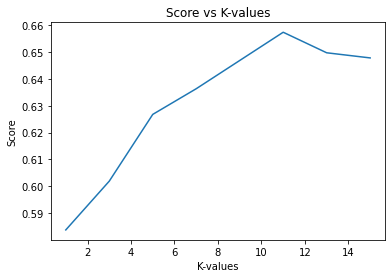

[0.583732057416268, 0.6019138755980862, 0.6267942583732058, 0.6363636363636364, 0.6468899521531101, 0.6574162679425838, 0.6497607655502392, 0.6478468899521531]


In [113]:
listK = [ i for i in range(0,16) if i%2 != 0 ]
scoreArray = [ doKNN(i) for i in listK ]

plt.plot(listK, scoreArray); plt.xlabel('K-values'); plt.ylabel('Score'); plt.title('Score vs K-values')
plt.show()
print(scoreArray)

In [114]:
# As we can see, the K = 11 is the one 
# that gives us the better score.